In [1]:
import torch
import torch.nn as nn
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 正确目标为1010，现在加入随机性
def generate_real():
    real_data = torch.FloatTensor(
        [
            np.random.uniform(0.8, 1.0),
            np.random.uniform(0.0, 0.2),
            np.random.uniform(0.8, 1.0),
            np.random.uniform(0.0, 0.2)
        ]
    )
    return real_data

In [3]:
# 判别器
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # 计数、训练 进程记录
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        # 计算网络输出
        outputs = self.forward(inputs)

        # 计算损失
        loss = self.loss_function(outputs, targets)

        # 每训练10次增加计数器
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print('counter = ', self.counter)

        # 梯度归零，反向传播，更新权重
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def plot_grogress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

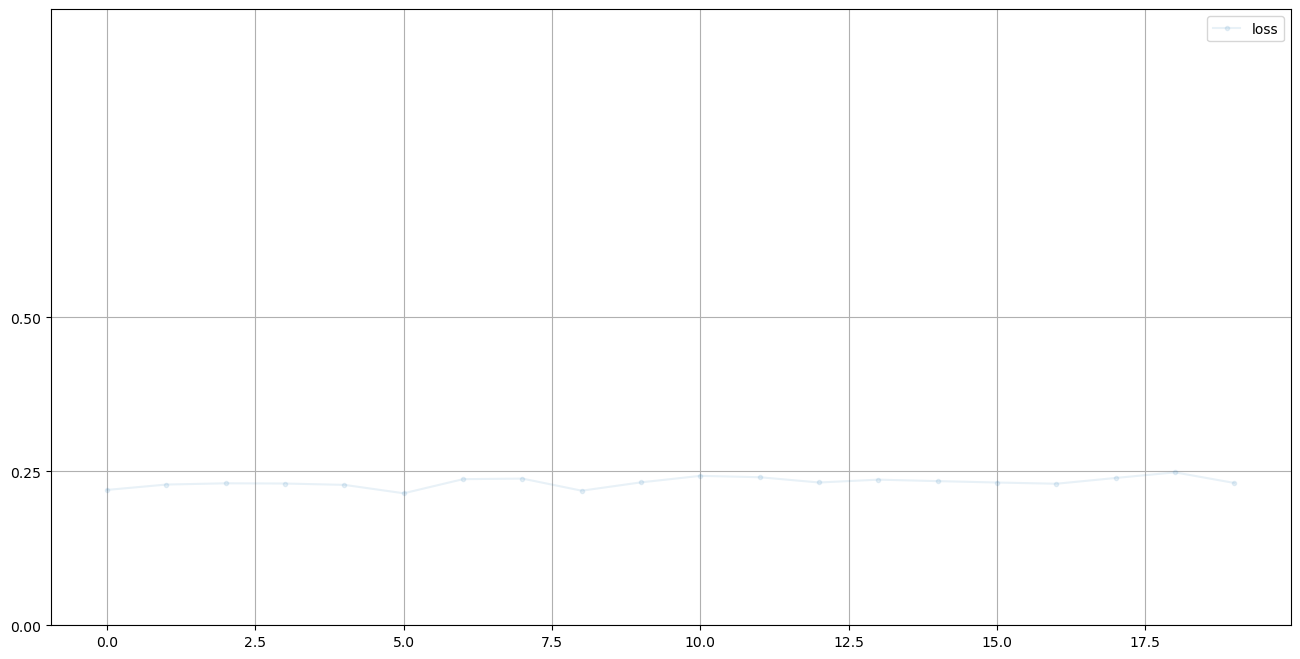

In [4]:
# 测试判别器
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

D = Discriminator()
for i in range(100):
    # 真实数据
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # 随机数据
    D.train(generate_random(4), torch.FloatTensor([0.0]))
D.plot_grogress()

In [9]:
# 构建生成器
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        # 定义网络层
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        # 创建优化器，使用随机梯度下降
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # 计数、训练 进程记录
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        # 计算网络输出
        g_output = self.forward(inputs)

        # 输入鉴别器
        d_output = D.forward(g_output)

        # 计算损失值
        loss = D.loss_function(d_output, targets)

        # 每训练10次增加计数器
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        
        # 梯度归零，反向传播，更新权重
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def plot_grogress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

In [10]:
# 训练GAN
D = Discriminator()
G = Generator()

# 训练鉴别器和生成器
for i in range(10000):

    # 用真实样本训练鉴别器
    D.train(generate_real(), torch.FloatTensor([1.0]))

    # 用生成样本训练鉴别器
    # 使用detach()以避免计算生成器G中的梯度
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))

    # 训练生成器
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))

counter =  10000
counter =  20000


In [23]:
G.plot_grogress()
G.forward(torch.FloatTensor([0.1]))

tensor([0.9227, 0.0633, 0.9342, 0.0527], grad_fn=<SigmoidBackward0>)

Error in callback <function flush_figures at 0x7faa569d4790> (for post_execute):


KeyboardInterrupt: 